In [1]:
import sys
sys.path.append('../')

import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from classic_descriptors.featurisation import process_dataframe
from analysis import analysis_stratification_influence, analysis_train_set_size, analysis_stratification_influence_substrates

from sklearn.metrics import mean_absolute_error, accuracy_score, balanced_accuracy_score, explained_variance_score, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


In [2]:
import dft_descriptors.prepocessing as pp
import dft_descriptors.featurisation as ft

In [3]:
df = pd.read_csv("data_csv/Data_test11222021.csv", sep = ',')
# Removing 
vc = df.DOI.value_counts()
doi_above_10 = np.array(vc[vc > 20].index)

indexes = []

for i, row in df.iterrows():
    if row["DOI"] not in doi_above_10:
        indexes.append(i)
        
df = df.drop(indexes)
df = df.reset_index(drop=True)

In [4]:
df2 = pp.preprocess(df)
df2["Lewis Acid"] = df2["Lewis Acid"].fillna('NoLewisAcid')
df2["Lewis Acid"] = df2["Lewis Acid"].replace('nan', 'NoLewisAcid')

In [5]:
Lewis_Acids_to_drop = ['O=C(O[Cs])O[Cs]', 'Cl[Cs]', 
                       'O=S(=O)(O[Sc](OS(=O)(=O)C(F)(F)F)OS(=O)(=O)C(F)(F)F)C(F)(F)F', 
                       'F[Cs]', 'O=P(O[Na])(O[Na])O[Na]', '[Rb+]',
                       'CC(C)(C)C(=O)O[Cs]', '[Cs+]', 'CC(=O)O[Cu]OC(C)=O', 'F[Sr]F']

In [6]:
for al in Lewis_Acids_to_drop:
    df2 = df2[df2["Lewis Acid"] != al]
    
df2 = df2.reset_index(drop=True)

In [7]:
import copy
X_o, y, DOIs, mechanisms, origins = ft.process_dataframe_dft(copy.copy(df2), data_path="data_csv/", origin=True)
X, y, DOIs, mechanisms, origins = ft.process_dataframe_dft(df2, data_path="data_csv/", origin=False)

NoLigand
NoLigand


In [29]:
for i in range(1419):
    if np.count_nonzero(np.isnan(X_o[i])) != 0:
        print(i, np.count_nonzero(np.isnan(X_o[i])))

102 6
103 6
104 6
105 6
106 6
107 6
108 6
109 6
110 6
111 6
112 6
113 6
114 6
115 6
116 6
117 6
118 6
119 6
120 6
121 6
122 6
123 6
124 6
125 6
126 6
127 6
128 6
129 6
130 6
131 6
132 6
133 6
134 6
135 6
136 6
137 6
138 6
139 6
140 6
141 6
142 6
143 6
144 6
145 6
146 6
147 6
148 6
149 6
150 6
151 6
152 6
153 6
154 6
155 6
156 6
157 6
158 6
311 6
312 6
313 6
314 6
316 6
317 6
318 6
319 6
320 6
321 6
322 6
323 6
324 6
325 6
326 6
327 6
328 6
329 6
330 6
331 6
332 6
333 6
334 6
335 6
336 6
337 6
338 6
339 6
340 6
341 6
342 6
343 6
344 6
345 6
346 6
347 6
348 6
349 6
350 6
351 6
352 6
353 6
354 6
355 6
356 6
357 6
358 6
359 6
360 6
361 6
362 6
363 6
364 6
365 6
366 6
367 6
368 6
369 6
370 6
371 6
372 6
373 6
374 6
375 6
376 6
377 6
378 6
379 6
380 6
381 6
382 6
383 6
384 6
385 6
386 6
387 6
388 6
389 6
402 6
403 6
404 6
405 6
406 6
407 6
408 6
409 6
438 6
440 6
441 6
442 6
443 6
444 6
445 6
446 6
447 6
448 6
449 6
450 6
451 6
452 6
453 6
454 6
455 6
456 6
457 6
458 6
459 6
460 6
461 6
462 

In [30]:
X_o[1369]

array([-9.87865133e-02, -6.50677336e-01, -2.08342295e+00,  1.13283359e+00,
        4.22915340e-01,  2.05562303e+00, -6.19698241e-01,  4.82087289e-02,
        9.56219142e-01,  2.89027884e-01, -1.34630959e+00, -1.05939776e+00,
       -2.15738073e+00, -2.14397950e+00,  9.74576310e-01, -7.92274574e-02,
       -1.95483647e-01,  1.62187606e-01,  1.74946330e-01,  2.44290014e-01,
       -1.28360837e+00, -1.36535488e+00,  6.64714172e-01, -9.33265292e-01,
        7.12477302e-02,  2.34842625e-01,  4.79226575e-01, -2.51930028e-01,
       -9.56182631e-02, -3.95872733e-01,  1.76209718e-01, -6.84922217e-01,
       -1.86377077e-01, -1.00648236e-01, -2.23464211e-01, -4.86324477e-01,
       -1.29187551e+00, -1.46220629e+00,  6.70394266e-01, -4.47205884e-01,
       -7.69457034e-01, -5.97353200e-01,  6.80693583e-01, -3.74137766e-02,
        1.16208876e+00,  1.19459342e+00, -1.25580137e-01,  6.85752628e-01,
        1.90915629e-01,  1.11632952e-01,  1.13508316e-01,  3.28157591e-01,
        1.27944749e+00,  

In [9]:
X_o.shape

(1419, 298)

In [8]:
estimators = [('predictor', RandomForestRegressor())]
pipe = Pipeline(estimators)
metric = r2_score

# 1. Yields distribution by origin and mechanism

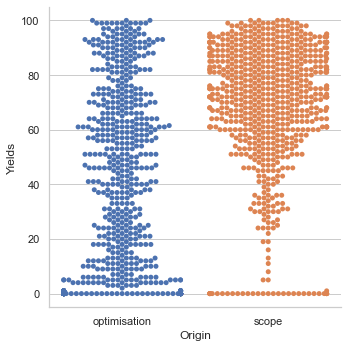

In [9]:
# Yield distribution according to scope/optimization
display_df =  pd.DataFrame(zip(y, mechanisms, origins), columns =['Yields', 'Mechanisms', 'Origin'])

sns.catplot(y="Yields", data=display_df, x='Origin',  kind="swarm")
plt.show()

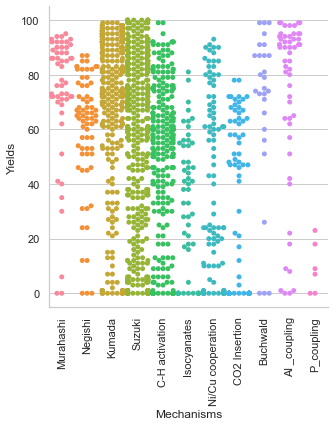

In [10]:
# Yield distribution according to mechanism
chart = sns.catplot(y="Yields", data=display_df, x='Mechanisms',  kind="swarm")
for axes in chart.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
metric_values, baseline_values, sizes = analysis_train_set_size(X, y, DOIs, metric=metric, predictor=pipe, n_iterations_external=2, n_iterations_internal=2)
#metric_values_o, baseline_values_o, sizes_o = analysis_train_set_size(X_o, y, DOIs, metric=metric, predictor=pipe, n_iterations_external=3, n_iterations_internal=10)

In [ ]:
metric_mean = np.mean(metric_values, axis=1)
metric_lower = np.percentile(metric_values, 5, axis=1)
metric_upper = np.percentile(metric_values, 95, axis=1)

baseline_mean = np.mean(baseline_values, axis=1)
baseline_lower = np.percentile(baseline_values, 5, axis=1)
baseline_upper = np.percentile(baseline_values, 95, axis=1)

#metric_mean_o = np.mean(metric_values_o, axis=1)
#metric_lower_o = np.percentile(metric_values_o, 5, axis=1)
#metric_upper_o = np.percentile(metric_values_o, 95, axis=1)

# 2. Evolution of performance with training data availibility

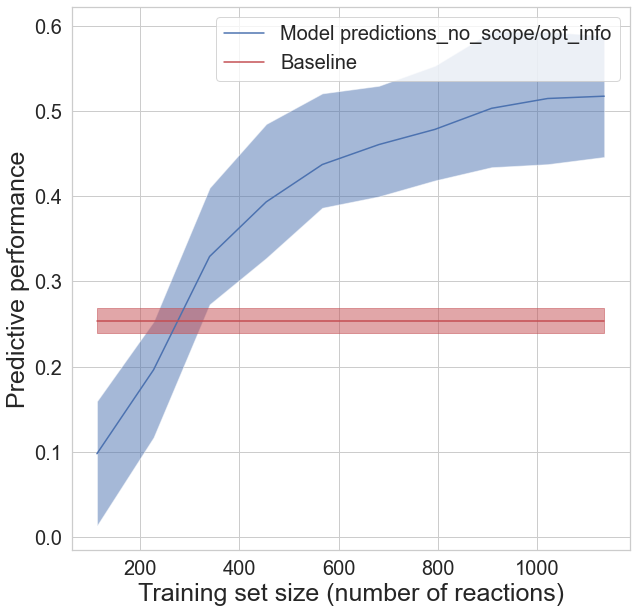

In [15]:
# How does (with fixed test set) performance improves as the training set size augments?
plt.figure(figsize=(10, 10))

plt.plot(sizes, metric_mean, label='Model predictions_no_scope/opt_info')
plt.fill_between(sizes, metric_lower, metric_upper, alpha=0.5)

#plt.plot(sizes_o, metric_mean_o, label='Model predictions_scope/opt_info')
#plt.fill_between(sizes_o, metric_lower_o, metric_upper_o, alpha=0.5)

plt.plot(sizes, baseline_mean, c='r', label='Baseline')
plt.fill_between(sizes, baseline_lower, baseline_upper, color='r', alpha=0.5)

plt.xlabel("Training set size (number of reactions)", fontsize=25)
plt.ylabel("Predictive performance", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [14]:
metric_standalone, metric_augmented, metric_baseline_standalone, metric_baseline_augmented, unique_stratification, sizes = analysis_stratification_influence(X, y, DOIs, metric=metric, predictor = pipe, test_size=0.95, n_iterations=2)

In [15]:
metric_augmented = np.mean(metric_augmented, axis=1)
metric_standalone = np.mean(metric_standalone, axis=1)
metric_baseline_standalone = np.mean(metric_baseline_standalone, axis=1)

In [16]:
metric_mechanism, metric_augmented_mechanism, metric_baseline_mechanism, _, unique_stratification_mechanism, sizes_mechanism = analysis_stratification_influence(X, y, mechanisms, metric=metric, predictor = pipe, test_size=0.2, n_iterations=2)

In [17]:
metric_augmented_mechanism = np.mean(metric_augmented_mechanism, axis=1)
metric_mechanism = np.mean(metric_mechanism, axis=1)
metric_baseline_mechanism = np.mean(metric_baseline_mechanism, axis=1)

In [18]:
def doi_2_mechanism(DOIs, doi):
    dois_indexes = np.where(DOIs==doi)[0]
    mechanism = mechanisms[dois_indexes[0]]
    return mechanism

def doi_2_origin(DOIs, doi):
    dois_indexes = np.where(DOIs==doi)[0]
    origin = origins[dois_indexes[0]]
    return origin

mecha = [doi_2_mechanism(DOIs, x) for x in unique_stratification]
orig = [doi_2_origin(DOIs, x) for x in unique_stratification]

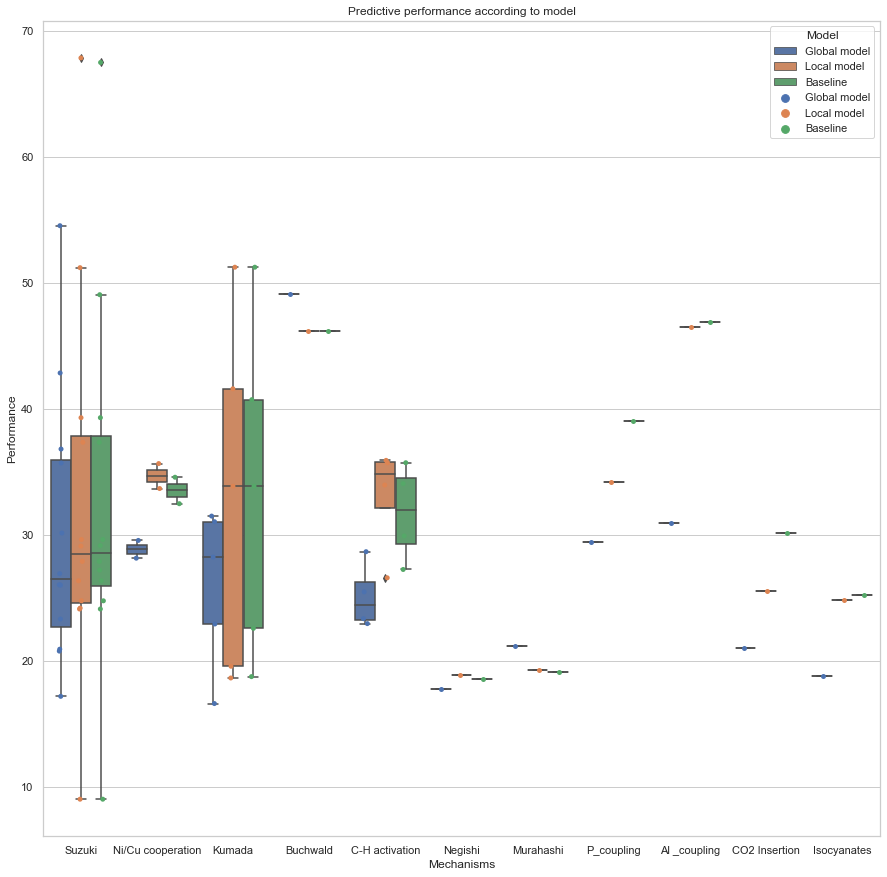

In [19]:
# Comparison of performance (distribution by DOI) of global, local and baseline models, stratified by mechanism

plt.figure(figsize=(15, 15))

global_df = pd.DataFrame(zip(metric_augmented, sizes, unique_stratification, mecha, orig, ["Global model" for _ in range(len(sizes))]), columns =['Performance', "Size", "DOI", "Mechanisms", "Origin", "Model"])
local_df = pd.DataFrame(zip(metric_standalone, sizes, unique_stratification, mecha, orig, ["Local model" for _ in range(len(sizes))]), columns =['Performance', "Size", "DOI", "Mechanisms", "Origin", "Model"])
baseline_df = pd.DataFrame(zip(metric_baseline_standalone, sizes, unique_stratification, mecha, orig, ["Baseline" for _ in range(len(sizes))]), columns =['Performance', "Size", "DOI", "Mechanisms", "Origin", "Model"])

display_df = pd.concat([global_df, local_df, baseline_df])

plt.title("Predictive performance according to model")
#plt.ylim(-5, 5)
sns.stripplot(x = "Mechanisms", y="Performance",  data=display_df, hue="Model", dodge=True)
sns.boxplot(x = "Mechanisms", y="Performance",  data=display_df, hue="Model", dodge=True)

plt.show()

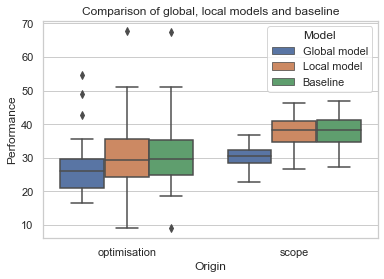

In [20]:
# Comparison of performance (distribution by DOI) of global, local and baseline models, stratified by scope/optimization

plt.title("Comparison of global, local models and baseline")
chart = sns.boxplot(x = "Origin", y="Performance",  data=display_df, hue="Model")

plt.show()

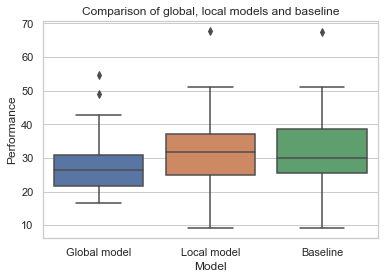

In [21]:
# Comparison of performance (distribution by mechanism) of global, local by mechanism and baseline models 

plt.title("Comparison of global, local models and baseline")
chart = sns.boxplot(x = 'Model', y="Performance",  data=display_df, dodge=True)
plt.show()

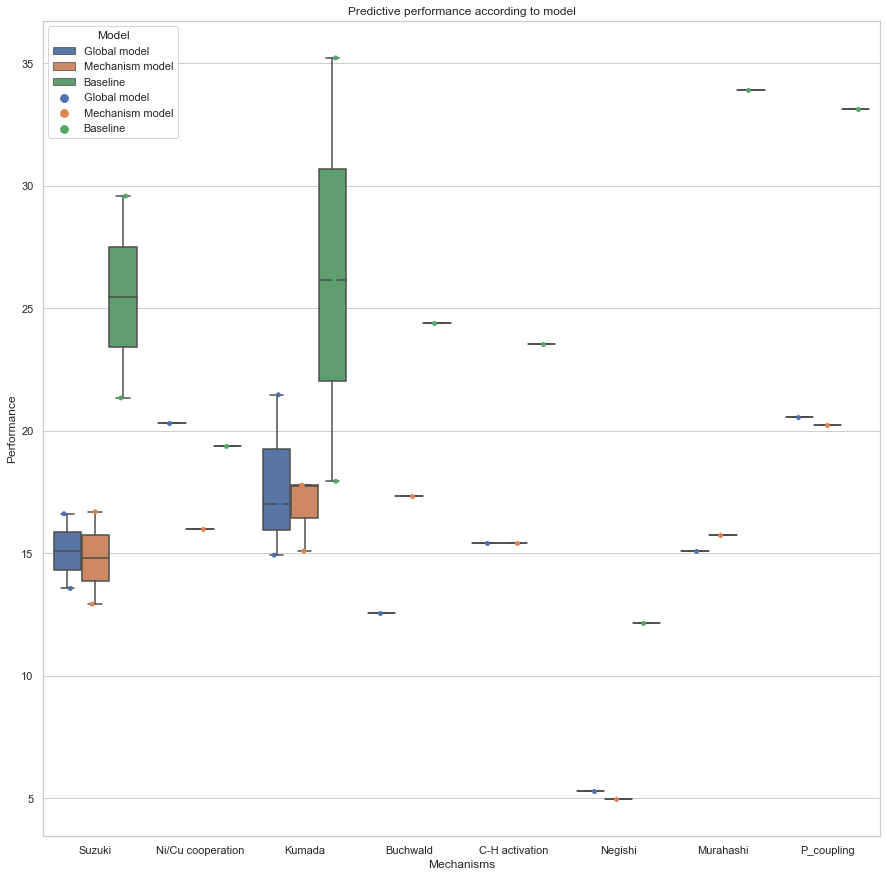

In [22]:
# Comparison of performance (distribution by mechanism) of global, local by mechanism and baseline models, stratified by mechanism

plt.figure(figsize=(15, 15))

global_df = pd.DataFrame(zip(metric_augmented_mechanism, sizes, unique_stratification, mecha, orig, ["Global model" for _ in range(len(sizes))]), columns =['Performance', "Size", "DOI", "Mechanisms", "Origin", "Model"])
local_df = pd.DataFrame(zip(metric_mechanism, sizes, unique_stratification, mecha, orig, ["Mechanism model" for _ in range(len(sizes))]), columns =['Performance', "Size", "DOI", "Mechanisms", "Origin", "Model"])
baseline_df = pd.DataFrame(zip(metric_baseline_mechanism, sizes, unique_stratification, mecha, orig, ["Baseline" for _ in range(len(sizes))]), columns =['Performance', "Size", "DOI", "Mechanisms", "Origin", "Model"])

display_df = pd.concat([global_df, local_df, baseline_df])

plt.title("Predictive performance according to model")
#plt.ylim(-5, 5)
sns.stripplot(x = "Mechanisms", y="Performance",  data=display_df, hue="Model", dodge=True)
sns.boxplot(x = "Mechanisms", y="Performance",  data=display_df, hue="Model", dodge=True)

plt.show()

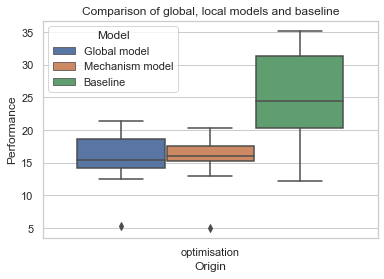

In [23]:
plt.title("Comparison of global, local models and baseline")
chart = sns.boxplot(x = "Origin", y="Performance",  data=display_df, hue="Model")
plt.show()

# 3. Increase of performance compared to baseline, by DOI

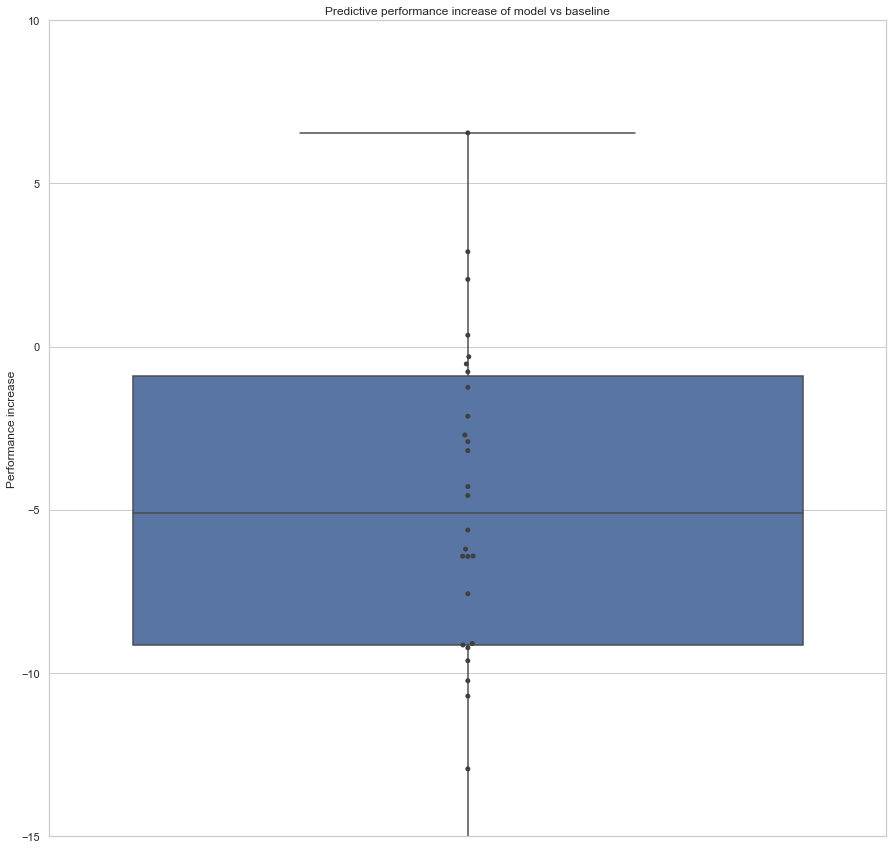

In [24]:
# Distribution of performance increase, global model vs baseline 
plt.figure(figsize=(15, 15))

display_df = pd.DataFrame(metric_augmented-metric_baseline_standalone, columns =['Performance increase'])

plt.title("Predictive performance increase of model vs baseline")
sns.boxplot(y="Performance increase", data=display_df)
sns.swarmplot(y="Performance increase", data=display_df, color=".25")
plt.ylim(-15, 10)
plt.show()

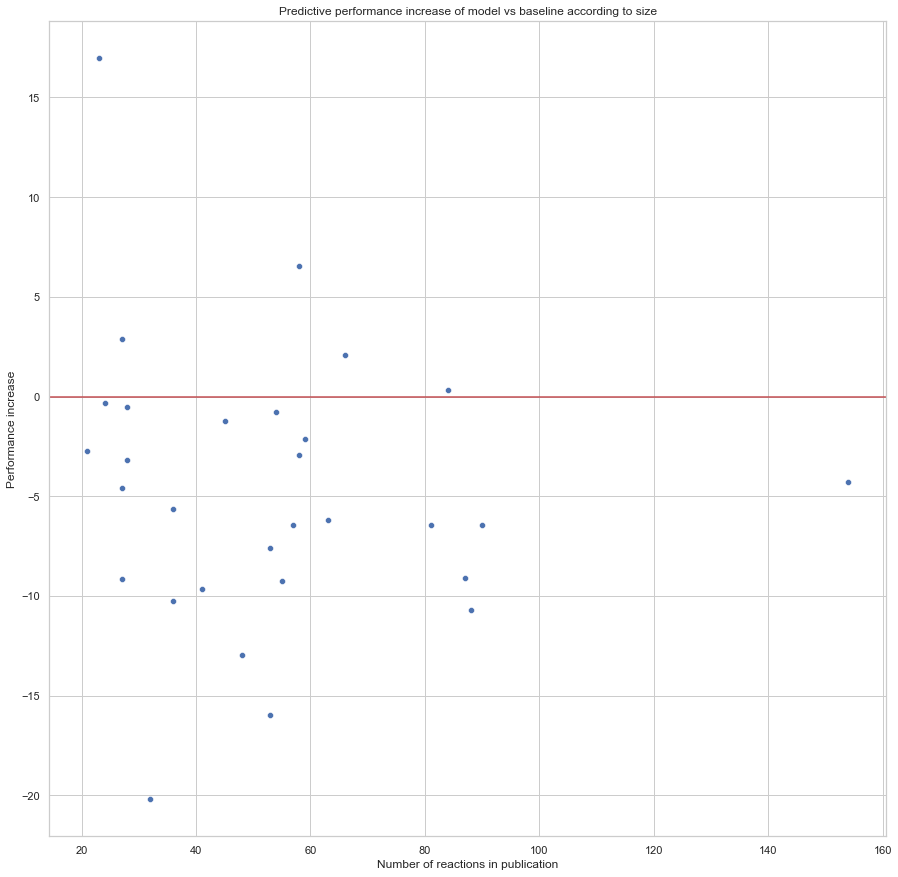

In [25]:
# Distribution of performance increase, global model vs baseline, by size of publication

plt.figure(figsize=(15, 15))

mecha = [doi_2_mechanism(DOIs, x) for x in unique_stratification]
orig = [doi_2_origin(DOIs, x) for x in unique_stratification]

display_df = pd.DataFrame(zip([x for x in metric_augmented-metric_baseline_standalone], sizes, unique_stratification, mecha, orig), columns =['Performance increase', "Size", "DOI", "Mechanisms", "Origin"])

plt.title("Predictive performance increase of model vs baseline according to size")
sns.scatterplot(x="Size", y="Performance increase", data=display_df)
plt.xlabel("Number of reactions in publication")
#plt.ylim(-1, 1.5)
plt.axhline(0, c='r')

plt.show()

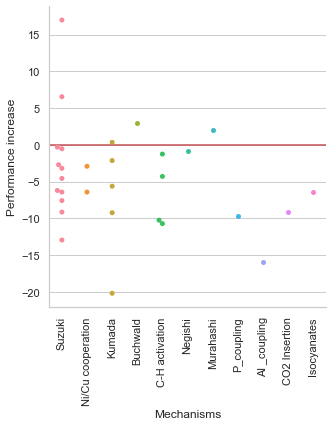

In [26]:
# Distribution of performance increase, global model vs baseline, by mechanism

chart = sns.catplot(x="Mechanisms", y="Performance increase", data=display_df, kind="swarm")
for axes in chart.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.axhline(0, c='r')
plt.show()

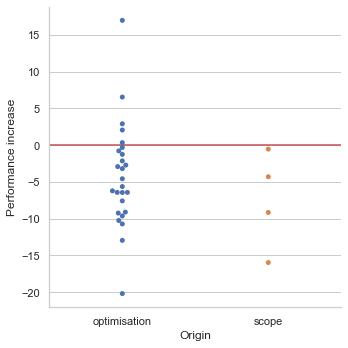

In [27]:
# Distribution of performance increase, global model vs baseline, by scope/optimization

chart = sns.catplot(x="Origin", y="Performance increase", data=display_df, kind="swarm")

plt.axhline(0, c='r')
plt.show()

# 4. Increase of performance compared to local model, by DOI

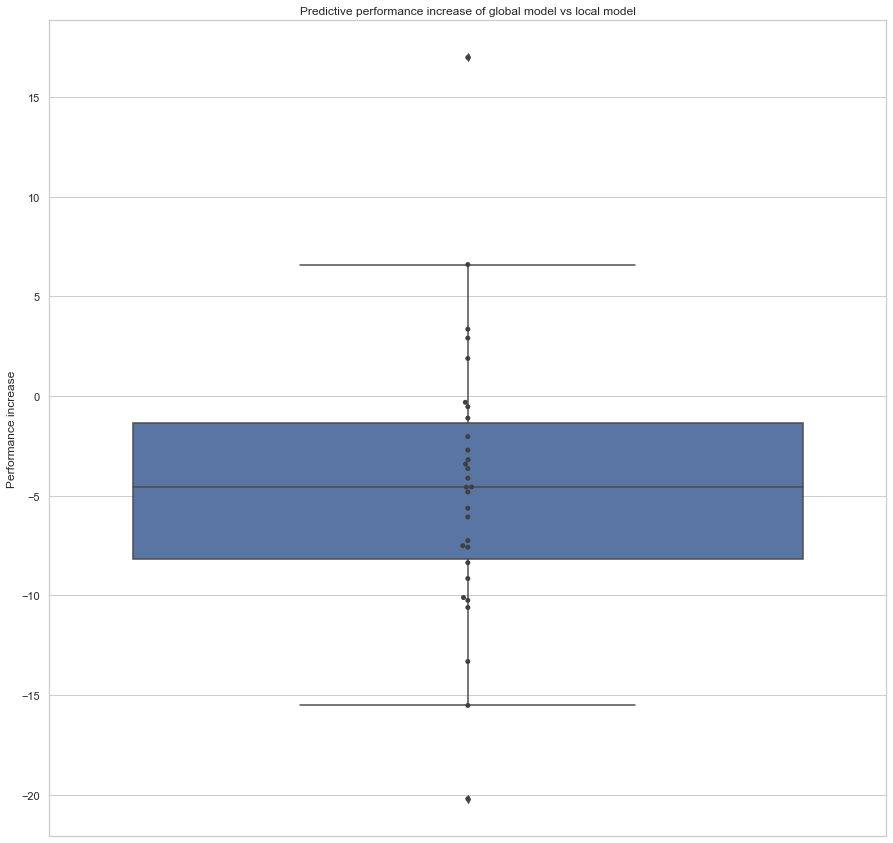

In [28]:
# Distribution of performance increase, global model vs local model

plt.figure(figsize=(15, 15))

display_df = pd.DataFrame(zip([x for x in metric_augmented-metric_standalone], sizes, unique_stratification, mecha, orig), columns =['Performance increase', "Size", "DOI", "Mechanisms", "Origin"])

plt.title("Predictive performance increase of global model vs local model")
sns.boxplot(y="Performance increase", data=display_df)
sns.swarmplot(y="Performance increase", data=display_df, color=".25")

plt.show()

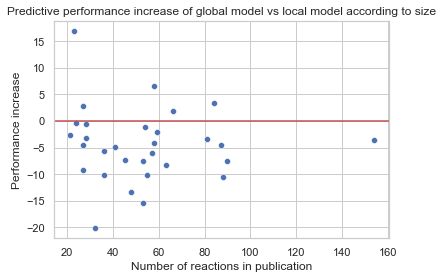

In [29]:
# Distribution of performance increase, global model vs local model, by size of publication

plt.title("Predictive performance increase of global model vs local model according to size")
sns.scatterplot(x="Size", y="Performance increase", data=display_df)
plt.xlabel("Number of reactions in publication")
#plt.ylim(-1, 1.5)
plt.axhline(0, c='r')

plt.show()

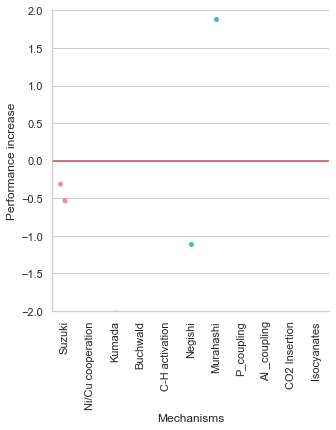

In [30]:
# Distribution of performance increase, global model vs local model, by mechanism

chart = sns.catplot(x="Mechanisms", y="Performance increase", data=display_df, kind="swarm")
for axes in chart.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.axhline(0, c='r')
plt.ylim(-2, 2)
plt.show()

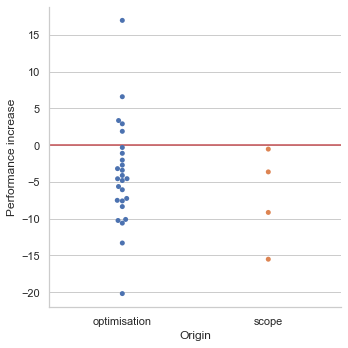

In [31]:
# Distribution of performance increase, global model vs local model, by scope/optimization

chart = sns.catplot(x="Origin", y="Performance increase", data=display_df, kind="swarm")
plt.axhline(0, c='r')
plt.show()